<a href="https://colab.research.google.com/github/alegomso/plantilla-proyecto/blob/main/Credit_Card_Fraud_Detection_Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
"""
Credit Card Fraud Detection – Baseline Model
===========================================

Script en Python que entrena y evalúa un modelo **RandomForest** para detectar
fraude en transacciones con tarjeta de crédito. Ahora gestiona de forma
segura la ausencia de **matplotlib**: si la librería no está disponible, el
script sigue funcionando y simplemente deshabilita la visualización de la
matriz de confusión.

Flujo principal
--------------
1. **Carga** del CSV (dataset de Kaggle)
2. **Exploración / limpieza** (valores nulos)
3. **Preprocesamiento**: escalado de `Time` y `Amount`
4. **Split estratificado** *train / test*
5. **Entrenamiento** de `RandomForestClassifier` (`class_weight="balanced"`)
6. **Evaluación**: *accuracy*, *precision*, *recall*, *F1* + (opcional) matriz
   de confusión

Cómo usar
---------
"""

'\nCredit Card Fraud Detection – Baseline Model\n===========================================\n\nScript en Python que entrena y evalúa un modelo **RandomForest** para detectar\nfraude en transacciones con tarjeta de crédito. Ahora gestiona de forma\nsegura la ausencia de **matplotlib**: si la librería no está disponible, el\nscript sigue funcionando y simplemente deshabilita la visualización de la\nmatriz de confusión.\n\nFlujo principal\n--------------\n1. **Carga** del CSV (dataset de Kaggle)\n2. **Exploración / limpieza** (valores nulos)\n3. **Preprocesamiento**: escalado de `Time` y `Amount`\n4. **Split estratificado** *train / test*\n5. **Entrenamiento** de `RandomForestClassifier` (`class_weight="balanced"`)\n6. **Evaluación**: *accuracy*, *precision*, *recall*, *F1* + (opcional) matriz\n   de confusión\n\nCómo usar\n---------\n'

In [7]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('/content/Credit Card Fraud Detection - Kaggle.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: creditcard.csv not found. Please make sure the file is uploaded.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully.


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

# Scale 'Time' and 'Amount'
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

print("Scaled 'Time' and 'Amount' columns.")
display(df.head())

Scaled 'Time' and 'Amount' columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Perform stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Data split into training and testing sets.
Training set shape: (227845, 30), (227845,)
Testing set shape: (56962, 30), (56962,)


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


Accuracy: 0.9995
Precision: 0.9605
Recall: 0.7449
F1 Score: 0.8391


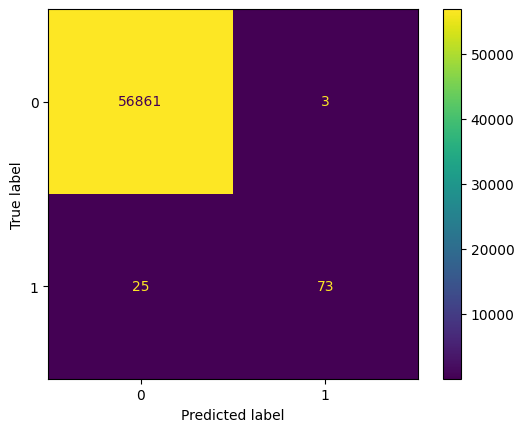

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix
try:
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
except ImportError:
    print("Matplotlib not found. Skipping confusion matrix visualization.")
except Exception as e:
    print(f"An error occurred while displaying the confusion matrix: {e}")